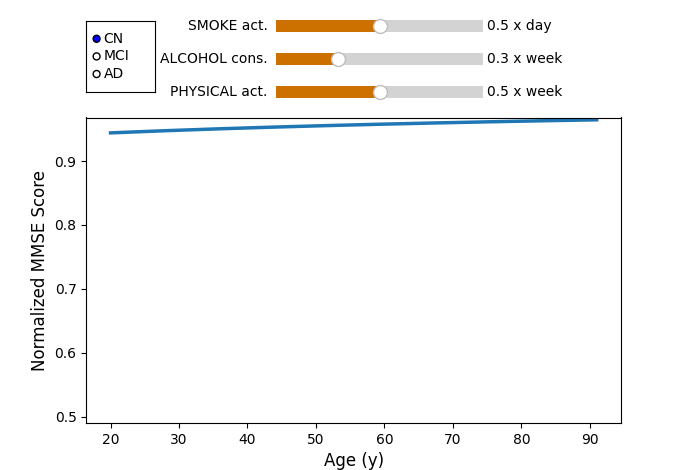

In [1]:
#!/usr/bin/env python3
import os
import numpy as np
import pandas as pd
#from bokeh.plotting import figure, show, save
#from bokeh.models import BoxAnnotation
#from bokeh.io import curdoc
#from bokeh.models import ColumnDataSource
#from bokeh.layouts import gridplot
#from bokeh.models import CDSView, ColumnDataSource, IndexFilter, GroupFilter
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from scipy import stats
#from fitter import Fitter
import statsmodels.api as sm
from statsmodels.formula.api import glm

#define matplotlib backend
#mpl.use('WebAgg') #MacOSX
%matplotlib widget


fig = plt.figure(figsize=(6.9, 4.7))

ax = fig.add_subplot(111)

fig.subplots_adjust(bottom=0.1, top=0.75)

# Create axes for sliders (SMOKE ALCOHOL PA)
ax_SM = fig.add_axes([0.4, 0.92, 0.3, 0.05])
ax_SM.spines['top'].set_visible(True)
ax_SM.spines['right'].set_visible(True)

ax_AL = fig.add_axes([0.4, 0.85, 0.3, 0.05])
ax_AL.spines['top'].set_visible(True)
ax_AL.spines['right'].set_visible(True)

ax_PA = fig.add_axes([0.4, 0.78, 0.3, 0.05])
ax_PA.spines['top'].set_visible(True)
ax_PA.spines['right'].set_visible(True)

# Create sliders
s_SM = Slider(ax=ax_SM, label='SMOKE act. ', valmin=0, valmax=1, valfmt='%1.1f x day', facecolor='#cc7000')

s_AL = Slider(ax=ax_AL, label='ALCOHOL cons. ', valmin=0, valmax=1, valinit=0.3, valfmt='%1.1f x week', facecolor='#cc7000')

s_PA = Slider(ax=ax_PA, label='PHYSICAL act. ', valmin=0, valmax=1, valinit=0.5, valfmt='%1.1f x week', facecolor='#cc7000')

# Distribution Data
data = pd.read_csv('/Users/Red/Desktop/E-DADS_proto/ARWIBO_test.csv')

data['Age'].fillna(data['Age'].median(), inplace=True)
data['MMSE_TOT'].fillna(data['MMSE_TOT'].median(), inplace=True)
data['Hippo-Vol'].fillna(data['Hippo-Vol'].median(), inplace=True)
data['Caudate-Vol'].fillna(data['Caudate-Vol'].median(), inplace=True)
data['Putamen-Vol'].fillna(data['Putamen-Vol'].median(), inplace=True)
data['Pallidum-Vol'].fillna(data['Pallidum-Vol'].median(), inplace=True)
data['Amygdala-Vol'].fillna(data['Amygdala-Vol'].median(), inplace=True)
data['Thalamus-Proper-Vol'].fillna(data['Thalamus-Proper-Vol'].median(), inplace=True)
data['3rd-Ventricle'].fillna(data['3rd-Ventricle'].median(), inplace=True)
data['4th-Ventricle'].fillna(data['4th-Ventricle'].median(), inplace=True)
data['SMOKE_TOT_DIE'].fillna(data['SMOKE_TOT_DIE'].median(), inplace=True)
data['N_ALCOHOL_TOT_WEEK'].fillna(data['N_ALCOHOL_TOT_WEEK'].median(), inplace=True)
data['IPAQ_TOT_WEEK'].fillna(data['IPAQ_TOT_WEEK'].median(), inplace=True)

data= data[data['MACRO_DX'].notna()] #drop rows with NaN from MACRO_DX column

data_scaled=data[['Years_Of_Education', 'MMSE_TOT', 'CSF_P-Tau', 'CSF_ABETA42', '3rd-Ventricle', '4th-Ventricle', 'Hippo-Vol', 'Thalamus-Proper-Vol', 'Caudate-Vol', 'Putamen-Vol', 'Pallidum-Vol', 'Amygdala-Vol', 'SMOKE_TOT_DIE', 'N_ALCOHOL_TOT_WEEK', 'IPAQ_TOT_WEEK']]
scaler = StandardScaler()
scaler.fit(data_scaled)
data_scaled=scaler.transform(data_scaled)

def norm_to_zero_one(df):
    return (df - df.min()) * 1.0 / (df.max() - df.min())

f = pd.DataFrame(data_scaled)
df = f.apply(norm_to_zero_one)

x=data[['Age']]
y1=data[['Hippo-Vol']]
y2=data[['Amygdala-Vol']]
y3=data[['Putamen-Vol']]
y4=data[['Pallidum-Vol']]
y5=data[['MMSE_TOT']]

x=np.array(data['Age'])
y1=np.array(data['Hippo-Vol'])
y1=np.array(data_scaled[:,6])
y1=np.array(df[6])
y2=np.array(data['Amygdala-Vol'])
y2=np.array(data_scaled[:,11])
y2=np.array(df[11])
y3=np.array(data['Putamen-Vol'])
y3=np.array(data_scaled[:,8])
y3=np.array(df[8])
y4=np.array(data['Pallidum-Vol'])
y4=np.array(data_scaled[:,9])
y4=np.array(df[9])
y5=np.array(data['MMSE_TOT'])
y5=np.array(data_scaled[:,1])
y5=np.array(df[1])

cf1=(data['MACRO_DX'].tolist())
cf2=(data['SMOKE_TOT_DIE'].tolist())
cf2=(data_scaled[:,12].tolist())
cf2=(df[12].tolist())
cf3=(data['N_ALCOHOL_TOT_WEEK'].tolist())
cf3=(data_scaled[:,13].tolist())
cf3=(df[13].tolist())
cf4=(data['IPAQ_TOT_WEEK'].tolist())
cf4=(data_scaled[:,14].tolist())
cf4=(df[14].tolist())



#MMSE FUNCTION
def function_MMSE(Mx: int, Mcf1: str, Mcf2: float, Mcf3: float, Mcf4: float) -> float:
    formula='y5 ~ x + cf1 + cf2 + cf3 + cf4'
    model_glm = glm(formula, df, family=sm.families.Binomial(sm.families.links.cauchy()), missing='drop')
    res = model_glm.fit()
    y_pred=res.predict(exog=dict(x=Mx, cf1=Mcf1, cf2=Mcf2, cf3=Mcf3, cf4=Mcf4))
    return y_pred
    
#function_MMSE(65, 'CN', 0.8, 0.5, 0.95)
#function_MMSE(np.array(65), 'nan', np.array(0.8), np.array(0.5), np.array(0.95))
#np.array(function_MMSE(np.array([65,65, 65]), np.array(['CN','MCI','AD']), np.array([0.8,0.8,0.8]), np.array([0.5,0.5,0.5]), np.array([0.5,0.5,0.5])))

# REMOVE NaN - OPTIONAL -
#x=np.array([item for item in x if not(pd.isnull(item)) == True])
#y1=y1[~np.isnan(y1)]
#y2=y2[~np.isnan(y2)]
#y3=y3[~np.isnan(y3)]
#y4=y4[~np.isnan(y4)]
#y5=y5[~np.isnan(y5)]

#cf1=[item for item in cf1 if not(pd.isnull(item)) == True]
#cf2=[item for item in cf2 if not(pd.isnull(item)) == True]
#cf3=[item for item in cf3 if not(pd.isnull(item)) == True]
#cf4=[item for item in cf4 if not(pd.isnull(item)) == True]



#Data
iteration_element=10;
sim_x = np.linspace(np.min(x), np.max(x), iteration_element)
sim_cf1_cn=(['CN'] * iteration_element)
sim_cf1_mci=(['MCI'] * iteration_element)
sim_cf1_ad=(['AD'] * iteration_element)
sim_cf2=np.linspace(np.min(cf2), np.max(cf2), iteration_element)
sim_cf3=np.linspace(np.min(cf3), np.max(cf3), iteration_element)
sim_cf4=np.linspace(np.min(cf4), np.max(cf4), iteration_element)

lim_inf_y = np.array(function_MMSE(98, 'AD', 1, 0, 0))
lim_sup_y = np.array(function_MMSE(20, 'CN', 0, 1, 1))

ax.set_ylim(np.min(lim_inf_y), np.max(lim_sup_y))
ax.set_xlabel('Age (y)', fontsize = 12)
ax.set_ylabel('Normalized MMSE Score', fontsize = 12)


#derive group value
axcolor = 'white'
rax = plt.axes([0.125, 0.805, 0.10, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('CN', 'MCI', 'AD'), active=0)

def groupfunc(label):
    f_d.get_zorder(label)
    radio.on_clicked(groupfunc)
    

y = np.array(function_MMSE(np.array(sim_x), np.array(sim_cf1_cn), np.array(sim_cf2), np.array(sim_cf3), np.array(sim_cf4)))
f_d, = ax.plot(sim_x, y, linewidth=2.5)


# Update values
def update(val):
    SM = np.array([s_SM.val] * iteration_element)
    AL = np.array([s_AL.val] * iteration_element)
    PA = np.array([s_PA.val] * iteration_element)
    RADIO_G = np.array([radio.value_selected] * iteration_element)
    f_d.set_data(sim_x, np.array(function_MMSE(sim_x, RADIO_G, SM, AL, PA)))
    fig.canvas.draw_idle()
    

s_SM.on_changed(update)
s_AL.on_changed(update)
s_PA.on_changed(update)
radio.on_clicked(update)


plt.show()

